In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [131]:
local_path = 'C:\\Users\\SAMANYU\\Documents\\'  # Make sure to include the separator at the end if needed

col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df_air=pd.read_csv(local_path+'AirQualityUCI.csv',sep=';',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)
df_air.head()


,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [132]:
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [133]:
df_air.dtypes

DATE             object
TIME             object
CO_GT            object
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT          object
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T                object
RH               object
AH               object
dtype: object

In [134]:
df_air.dropna(how='all',inplace=True)
#drop RH NAN rows
df_air.dropna(thresh=10,axis=0,inplace=True)

In [135]:
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,NaN,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,NaN,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,NaN,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,NaN,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,NaN,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [136]:
df_air.shape

(8991, 15)

In [137]:
df_air.describe()

,PT08_S1_CO,NMHC_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3
count,8991.000000,887.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000
mean,1099.833166,218.607666,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128
std,217.080037,206.615130,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288
min,647.000000,7.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000
25%,937.000000,66.000000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000
50%,1063.000000,145.000000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000
75%,1231.000000,297.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000


In [138]:
# #Split hour from time into new column
# df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
# df_air.HOUR.head()
# Split hour from time into a new column as integers (discarding decimal part)
df_air['HOUR'] = df_air['TIME'].apply(lambda x: int(x.split(':')[0].split('.')[0]))
df_air['HOUR'].head()


0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

In [139]:
print('Count of missing values:\n',df_air.shape[0]-df_air.count())

Count of missing values:
 DATE               0
TIME               0
CO_GT           1557
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


In [140]:
df_air['DATE']=pd.to_datetime(df_air.DATE, format='%d/%m/%Y')   #Format date column

In [141]:
df_air.set_index('DATE',inplace=True)

In [142]:
df_air['MONTH']=df_air.index.month     #Create month column (Run once)
df_air.reset_index(inplace=True)
#df_air.head()

In [143]:
df_air.drop('NMHC_GT',axis=1,inplace=True)    #dropping coloumn NMHC_GT as it has a lot of missing data

In [144]:
# filling NaN values with monthly avg of that particular hour
df_air['CO_GT'] = pd.to_numeric(df_air['CO_GT'], errors='coerce')
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [145]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE               0
TIME               0
CO_GT           2348
PT08_S1_CO         0
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT           261
PT08_S3_NOX        0
NO2_GT           261
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
MONTH              0
dtype: int64


In [146]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

In [147]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64


In [148]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [149]:
col_2=['DATE','TIME','CO_GT','PT08_S1_CO', 'C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH'] ## creating col_2 as i had dropped Nhmc_GT earlier because of a lot of NaN values
X = df_air[col_2].drop(columns='RH')
y=df_air['RH']                    

In [150]:
ss=StandardScaler()     

In [151]:
# Assuming 'DATE' and 'TIME' are the timestamp columns, you may want to exclude them
non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in X.columns if col not in non_numeric_columns]

# Select only numeric columns for scaling
X_numeric = X[numeric_columns]

# Replace commas with dots in the numeric columns
X_numeric = X_numeric.replace(',', '.', regex=True)

# Convert the values to numeric type
X_numeric = X_numeric.apply(pd.to_numeric, errors='coerce')

# Fit and transform only the numeric columns
X_numeric_std = ss.fit_transform(X_numeric)

# Create a new DataFrame with scaled values
X_std = X.copy()
X_std[numeric_columns] = X_numeric_std

In [152]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.15, random_state=42)

In [153]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
print(y_train.shape)
print(y_test.shape)

Training data size: (7642, 13)
Test data size: (1349, 13)
(7642,)
(1349,)


In [154]:
X_train

,DATE,TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH
5026,2004-10-12,08.00.00,0.679764,0.009982,0.633191,0.756500,1.012608,-0.730107,-0.114130,0.397864,0.228614,-0.047311,0.370414
510,2004-04-01,00.00.00,-0.459167,0.198863,-0.507840,-0.427835,-0.709171,0.586077,-0.487812,0.059896,-0.112699,-0.715364,-0.411675
1061,2004-04-25,02.00.00,-1.028633,-0.777789,-0.870285,-0.937548,-0.876778,1.267533,-0.773570,-0.402281,-1.304782,-0.636104,-0.408703
6455,2004-12-10,21.00.00,1.533963,-1.049594,-0.279634,-0.146743,0.763738,0.321283,0.853049,-1.577944,-0.193007,-0.636104,-1.767330
5627,2004-11-06,09.00.00,-0.174434,0.516736,0.847973,0.943894,1.114188,-1.107828,-0.246018,0.374755,0.469540,-0.273769,0.563336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2004-11-10,20.00.00,1.533963,0.816181,1.519168,1.483591,1.779537,-1.107828,1.622396,0.519185,0.773207,-0.941823,-0.368336
5191,2004-10-19,05.00.00,-1.028633,-0.579695,-0.413873,-0.300406,-0.495854,-0.247246,-1.257159,-0.211633,-0.172930,-0.353030,0.573243
5390,2004-10-27,12.00.00,-0.174434,0.525950,0.901669,0.988869,1.063398,-0.994901,0.457385,0.816712,0.715485,0.269732,0.962554
860,2004-04-16,17.00.00,0.679764,2.271947,1.733950,1.644750,0.372655,-0.987113,0.743143,2.029927,1.069346,-0.420968,0.573986


In [155]:
# import pandas as pd
# from datetime import datetime

# # Assuming df is your DataFrame and 'Date' is the column with date strings
# date_format = "%d-%m-%Y"

# # Convert 'Date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'], format=date_format)

# # Convert the datetime format to numeric timestamps
# df['numeric_timestamp'] = df['Date'].apply(lambda x: x.timestamp())

# # # Display the updated DataFrame
# # print(df)
# import pandas as pd

# # Assuming df is your DataFrame and 'Date' is the column with date strings
# date_format = "%d-%m-%Y"

# # Convert 'Date' column to datetime format with mixed format inference
# df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')

# # Handle missing or invalid dates by providing a default timestamp (e.g., 0) or skipping rows
# df['numeric_timestamp'] = df['Date'].apply(lambda x: x.timestamp() if not pd.isnull(x) else 0)

# # Display the updated DataFrame
# print(df)


In [156]:
print(X_train.dtypes)
print(y_train.dtypes)


DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
AH                     float64
dtype: object
object


In [157]:
# # Assuming 'Time' is in the format 'HH.MM.SS'
# df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S')
# df['numeric_time'] = df['Time'].dt.hour * 60 + df['Time'].dt.minute


In [158]:
# df.drop('Time', axis=1, inplace=True)

In [159]:
print(X_train.dtypes)
print(y_train.dtypes)

DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
AH                     float64
dtype: object
object


In [160]:
# df['numeric_time']

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'DATE' and 'TIME' are the timestamp columns
non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in X_train.columns if col not in non_numeric_columns]

# Select only numeric columns for scaling
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# Instantiate StandardScaler
ss = StandardScaler()

# Fit and transform X_train
X_train_scaled = ss.fit_transform(X_train_numeric)

# Transform X_test using the same scaler
X_test_scaled = ss.transform(X_test_numeric)
y_train = y_train.str.replace(',', '.').astype(float)
# Instantiate the Linear Regression model
lr = LinearRegression()

# Fit the model on the scaled training data
lr_model = lr.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = lr_model.predict(X_test_scaled)


In [162]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Replace commas with dots and convert to float
y_test_numeric = y_test.str.replace(',', '.').astype(float)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred))

# Calculate R-squared
r2 = r2_score(y_test_numeric, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



RMSE: 6.273306720513239
R-squared: 0.8718116617106689


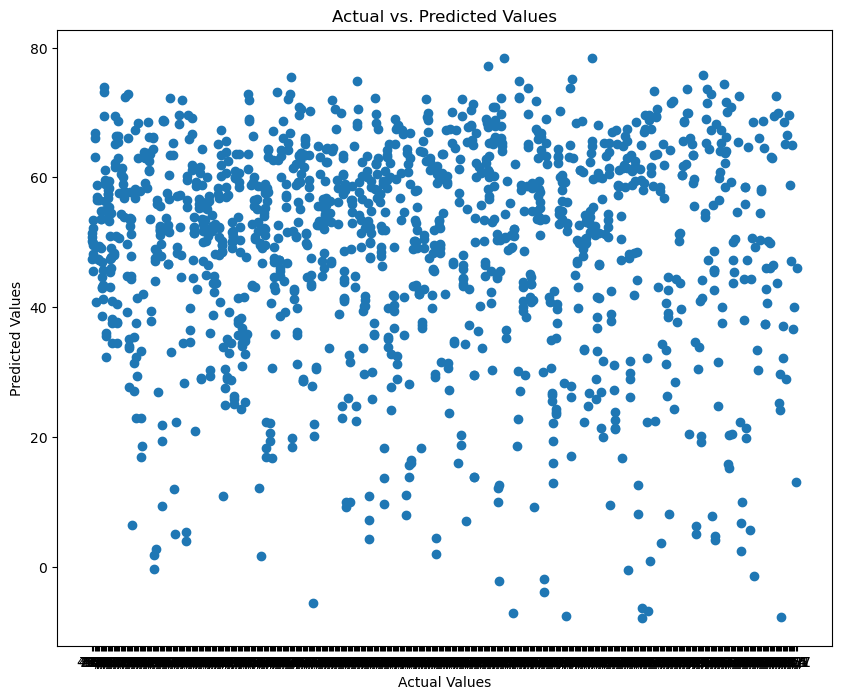

In [163]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
